In [1]:
import numpy as np
from deepsudoku import REPO_PATH
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import tqdm

os.chdir(REPO_PATH)

In [2]:
raw = pd.read_csv("stats/dl_architectures_test_results.csv", index_col= 0)
df = raw.groupby(["run","missing_digits"]).mean().reset_index()
df

,run,missing_digits,win,accuracy
0,big_conv_head,1,1.000000,1.000000
1,big_conv_head,2,1.000000,1.000000
2,big_conv_head,3,1.000000,1.000000
3,big_conv_head,4,1.000000,1.000000
4,big_conv_head,5,1.000000,1.000000
...,...,...,...,...
130,same_fc_mlp,23,0.000075,0.893790
131,same_fc_mlp,24,0.000100,0.885728
132,same_fc_mlp,25,0.000050,0.877315
133,same_fc_mlp,26,0.000000,0.868333


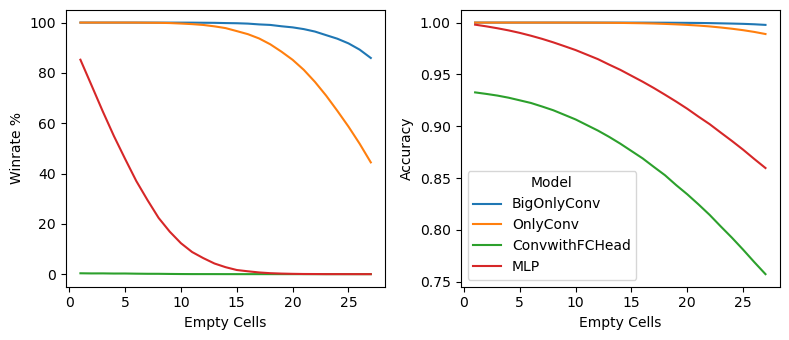

In [3]:
rename = {
    "same_fc_mlp" : "MLP",
    "same_conv_with_fc_head" :"ConvwithFCHead",
    "same_conv_conv_head_better_loss" : "OnlyConv",
    "big_conv_head" : "BigOnlyConv",
}

rename_cols = {
    "missing_digits":"Empty Cells",
    "run":"Model",
    "win": "Winrate %",
    "accuracy" : "Accuracy"
    }

keys = list(rename.keys())
plot_df = df.query("run in @keys")
plot_df = plot_df.replace({"run":rename}).rename(columns = rename_cols)
plot_df["Winrate %"] *= 100

plt.figure(figsize = (8,3.5))
plt.subplot(1,2,1)
sns.lineplot(plot_df,x = "Empty Cells", y ="Winrate %", hue = "Model", legend = None)
plt.subplot(1,2,2)
sns.lineplot(plot_df,x = "Empty Cells", y ="Accuracy", hue = "Model") 
plt.tight_layout()
plt.savefig("imgs/sup_different_architectures.jpg", bbox_inches='tight', dpi=300)

In [3]:
winrates = df.groupby("run")["win"].mean() * 100
winrates = np.round(winrates,2)
winrates.to_json("stats/sup_test_winrates.json")

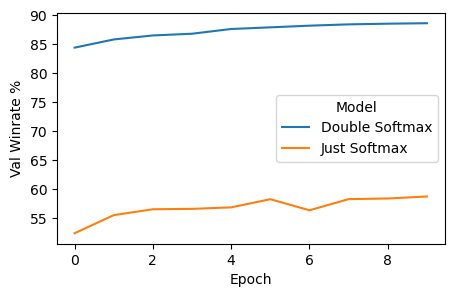

In [4]:
train = pd.read_csv("stats/dl_archi.csv", index_col = 0)
train.run.unique()

wanted = ["same_conv_conv_head_better_loss_1693856195.751896", "same_conv_conv_head_1693849476.7056108"]

plot_df = train.query("run in @wanted")

rename = {
    "same_conv_conv_head_better_loss_1693856195.751896":"Double Softmax",
    "same_conv_conv_head_1693849476.7056108":"Just Softmax"
}

plt.figure(figsize=(5,3))

plot_df = plot_df.replace({"run":rename}).reset_index()
plot_df.columns = [i.replace("_"," ").title() for i in plot_df.columns]
plot_df = plot_df.rename(columns = {"Loss":"Train Loss", "Winrate":"Train Winrate","Run": "Model","Val Winrate":"Val Winrate %"})

plot_df["Val Winrate %"] *= 100

sns.lineplot(plot_df, x = "Epoch", y = "Val Winrate %", hue = "Model")
plt.savefig("imgs/sup_softplus_effect.jpg", bbox_inches='tight', dpi=300)
plt.show()